In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf # model creation
import os

from tensorflow import keras #model loading
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/gdrive/MyDrive/Mega Project/actual dataset/Indian Food Images/Indian Food Images",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4010 files belonging to 80 classes.
Using 3208 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/gdrive/MyDrive/Mega Project/actual dataset/Indian Food Images/Indian Food Images",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4010 files belonging to 80 classes.
Using 802 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

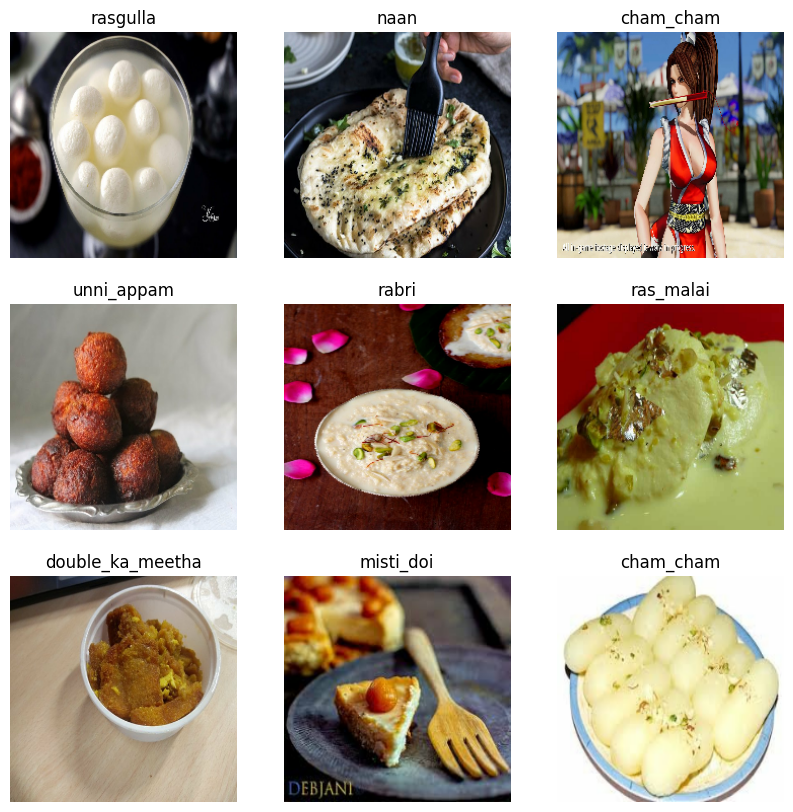

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


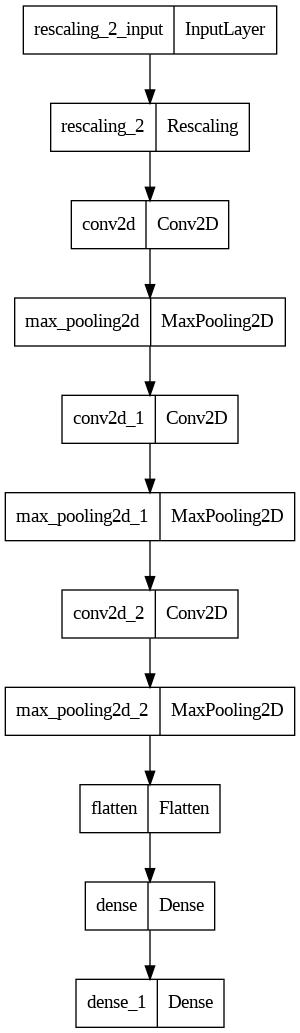

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

tf.keras.utils.plot_model(
    model,
    to_file='model_CNN.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
101/101 [==============================] - 340s 3s/step - loss: 4.4111 - accuracy: 0.0115 - val_loss: 4.3846 - val_accuracy: 0.0112
Epoch 2/10
101/101 [==============================] - 203s 2s/step - loss: 4.3501 - accuracy: 0.0209 - val_loss: 4.2786 - val_accuracy: 0.0249
Epoch 3/10
101/101 [==============================] - 202s 2s/step - loss: 4.0312 - accuracy: 0.0676 - val_loss: 4.0743 - val_accuracy: 0.0499
Epoch 4/10
101/101 [==============================] - 202s 2s/step - loss: 3.2006 - accuracy: 0.2332 - val_loss: 4.1446 - val_accuracy: 0.1359
Epoch 5/10
101/101 [==============================] - 204s 2s/step - loss: 1.9108 - accuracy: 0.5358 - val_loss: 4.8359 - val_accuracy: 0.1945
Epoch 6/10
101/101 [==============================] - 205s 2s/step - loss: 0.9040 - accuracy: 0.7805 - val_loss: 5.9957 - val_accuracy: 0.2132
Epoch 7/10
101/101 [==============================] - 205s 2s/step - loss: 0.3698 - accuracy: 0.9140 - val_loss: 7.4938 - val_accuracy: 0.2406

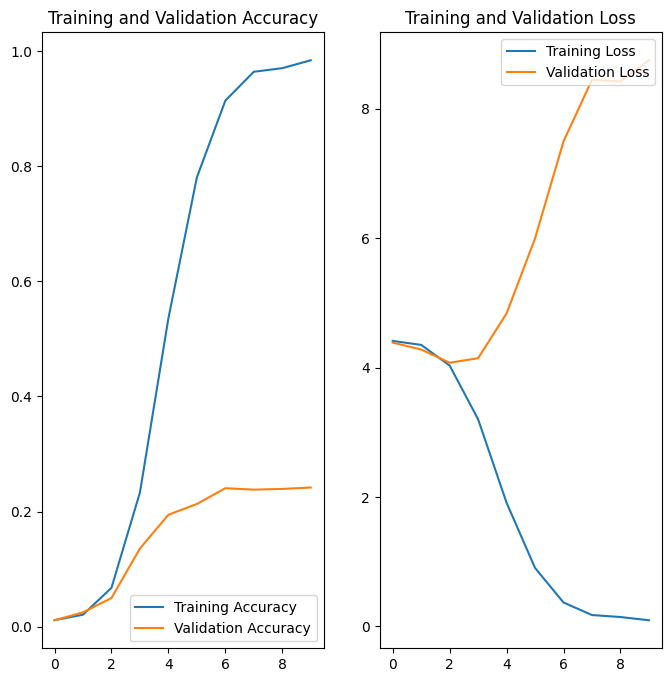

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
print('Accuracy : ',acc)
print('Validation Accuracy :', val_acc)

Accuracy :  [0.011533665470778942, 0.0208852868527174, 0.06764338910579681, 0.23316708207130432, 0.5358479022979736, 0.780548632144928, 0.913965106010437, 0.9641520977020264, 0.9703865051269531, 0.9841022491455078]
Validation Accuracy : [0.01122194528579712, 0.02493765577673912, 0.04987531155347824, 0.13591022789478302, 0.1945137083530426, 0.21321696043014526, 0.24064837396144867, 0.23815461993217468, 0.23940148949623108, 0.24189525842666626]


In [ ]:
model.save("/content/gdrive/MyDrive/Mega Project/Colab Notebooks/food_prediction.h5")

In [ ]:


img = tf.keras.utils.load_img(
    "/content/gdrive/MyDrive/Mega Project/0b685b98d8.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 169ms/step
This image most likely belongs to chicken_tikka with a 92.66 percent confidence.


In [ ]:


img = tf.keras.utils.load_img(
    "/content/gdrive/MyDrive/Mega Project/1b1da65165.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 45ms/step
This image most likely belongs to naan with a 98.71 percent confidence.


In [ ]:


img = tf.keras.utils.load_img(
    "/content/gdrive/MyDrive/Mega Project/0a6cd580bd.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 297ms/step
This image most likely belongs to pootharekulu with a 99.48 percent confidence.
